### Univariate and Bivariate statistics -
In this notebook we will look at what are Univariate and Bivariate statistics and understand their significance in statistics.

Full disclosure that the definitions and notes in the following sections were taken from the book - ["Forecasting Principles and Practice"](https://www.otexts.org/fpp) by Ron J Hyndman and George Athanasopoulos, It's a Comprehensive introduction to the latest forecasting methods using R. 
In this notebook we will look at Univariate Statistics and Bivariate Statistics. Both are methods to analyze and describe the data with a summary statistic. A summary number calculated from the data is called a statistic.

- Univariate Descriptive Statistics:
For a single data set, the most widely used statistics are the average and median. Following are a list of the different types of univariate statistic -
  - Mean
  - Median
  - Mode
  - Variance
  - Standard Deviation
  - Inter Quartile Range

- BiVariate Statistics:
Here's a couple of bivariate statistics that are used to measure the relationship between two variables.
  - Covariance
  - Correlation Coefficient
  
In the following code blocks let's take a look at each of the above mentioned methods.


- Population Mean
  -  This is the average of an entire dataset, For example to calculate the Average height of all men above 35 in the USA.
  
- Sample Mean
  - While it will be a daunting task to calculate the avarege height of all men above the age of 35 in the USA, but it will be relatively easier to poll a subset (read) of the population, provided the sample is a good representaiton of the general population.
  \begin{align}
  \bar{x}=1/N\sum_{i=1}^{n}xi
  \end{align}
 where N denotes the total number of observations

The wing_lengths variable is a list that contains the length of the wings of a house fly in millimeters. In the next code cells we will be working with this dataset to calculate the univariate statistics.


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [19]:
wing_lengths = [36, 37, 38, 38, 39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 50, 50, 50, 50, 50, 50, 51, 51, 51, 51, 52, 52, 53, 53, 54, 55]
wing_mean = np.mean(wing_lengths)
wing_median = np.median(wing_lengths)
wing_mode = stats.mode(wing_lengths)
print(wing_mode)
print("Mean of wing lengths - {}".format(wing_mean))
print("Median of wing lengths - {}".format(wing_median))
print("Mode of wing lengths - {}".format(wing_mode))

ModeResult(mode=array([45]), count=array([10]))
Mean of wing lengths - 45.5
Median of wing lengths - 45.5
Mode of wing lengths - ModeResult(mode=array([45]), count=array([10]))


The mean and the median of this dataset is the same at 45.5.

Let's plot the histogram and the mean for the wing_lengths dataset


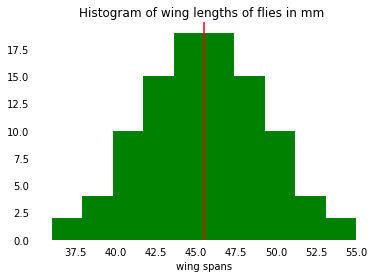

In [61]:
plt.hist(wing_lengths, bins=10, color="g")
plt.axvline(wing_mean, color="r")
plt.xlabel("wing spans")
plt.title("Histogram of wing lengths of flies in mm ")
# To improve the data-ink ratio we will remove the ticks from both axes
# We also want to remove the spines to tell a compelling story
ax = plt.gca()
ax.tick_params(bottom = "off", left="off")
spines = ax.spines
for k,spine in spines.items():
    spine.set_visible(False)
plt.show()

#### Variance
The formula to calculate the variance is -
\begin{equation*}
{var}=1/N\sum_{i=1}^n(xi-\bar{x})^2
\end{equation*}
_ Where N is the total number of observations and x bar is the mean _

In [24]:
# write a function to calculate the variance of a dataset, assume the input will be a list
def calc_variance(data):
    mean = np.mean(data)
    return np.mean([(x-mean)**2 for x in data])
wing_length_variance = calc_variance(wing_lengths)
print("The variance of the wing length dataset is {}".format(wing_length_variance))

The variance of the wing length dataset is 15.21


#### Standard deviation
The standard deviation gives an idea how much spread there is in the data around the mean.
The formula to calculate the standard deviation is -
\begin{equation*}
\sigma=\sqrt{1/N\sum_{i=1}^n(xi-\bar{x})^2}
\end{equation*}
_ Which is the square root of the variance _
\begin{equation*}
\sigma=\sqrt{var}
\end{equation*}

In [27]:
# we can use the calc_variance method to calculate the standard deviation
std_dev = calc_variance(wing_lengths)**(1/2)
print("Standard deviation of the wing length dataset is {}".format(std_dev))

# lets validate the answer by using the numpy method
std_dev_numpy = np.std(wing_lengths)
print("Standard deviation of the wing length dataset using numpy {}".format(std_dev_numpy))

Standard deviation of the wing length dataset is 3.9
Standard deviation of the wing length dataset using numpy 3.9


#### Plot the Standard deviations
Next we will plot the data points that are 1, 2 and 3 standard deviations from the mean.

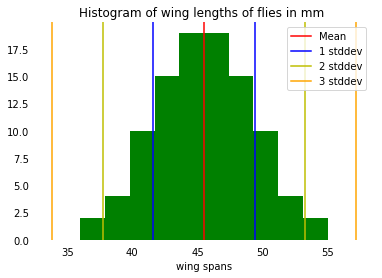

In [41]:
plt.hist(wing_lengths, bins=10, color="g")
plt.axvline(wing_mean, color="r", label="Mean")
plt.xlabel("wing spans")
plt.title("Histogram of wing lengths of flies in mm ")
# To improve the data-ink ratio we will remove the ticks from both axes
# We also want to remove the spines to tell a compelling story
ax = plt.gca()
ax.tick_params(bottom = "off", left="off")
spines = ax.spines
for k,spine in spines.items():
    spine.set_visible(False)
plt.axvline(wing_mean+std_dev,color="b", label="1 stddev")
plt.axvline(wing_mean-std_dev, color="b")
plt.axvline(wing_mean-2*std_dev, color="y", label="2 stddev")
plt.axvline(wing_mean+2*std_dev, color="y")
plt.axvline(wing_mean-3*std_dev, color="orange", label="3 stddev")
plt.axvline(wing_mean+3*std_dev, color="orange")
ax.legend(loc="upper right")
plt.show()

Observations :
From the plot above, we can infer the following -
- About 68% of the data is within 1 standard deviation.
- 95% of the data is within 2 standard deviations
- 100% of the data points are within the 3 standard deviations.

#### Bivariate statistics
In the next section we will look at bivariate statistics i.e. the relationship between two columns. We will be using scatter plots to get an intuiton of the data. We will also be employing statistical tools such the correlation coeficient to analyze if two columns have a linear relationship.

We'll be calculating statistics using data from the National Basketball Association (NBA). Here are the first few rows of the CSV file we'll explore:

In [43]:
import pandas as pd
nba_data = pd.read_csv("nba_2013.csv")
nba_data.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


Each row holds data on a single player for a single season. It contains the player's team, the total number of points the player scored, and other information.

- Here are some of the interesting columns:

  - player - The player's name
  - pts - The total number of points the player scored
  - ast - The player's total number of assists
  - fg. - The player's field goal percentage for the season

Much of statistics deals with analyzing how variables impact each other, and the first step is to graph them out with a scatterplot.

While graphing them out, we can look at correlation. If two variables change together (ie, when one goes up, the other goes up), we know that they are correlated.

* Make a scatterplot of the "fta" (free throws attempted) column against the "pts" column.
* Make a scatterplot of the "stl" (steals) column against the "pf" column.

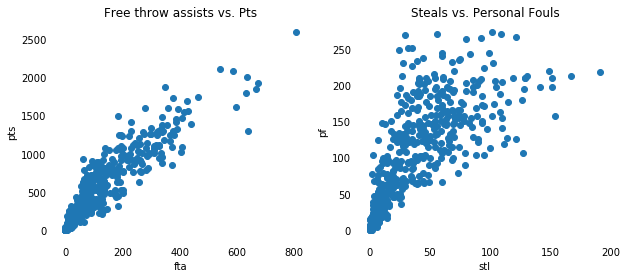

In [59]:
cols =["fta", "pts", "stl", "pf"]
titles =["Free throw assists vs. Pts", "Steals vs. Personal Fouls"]
fig = plt.figure(figsize=(10,4))
col_index = 0
for i in range(0,2):
    ax = fig.add_subplot(1,2, i+1)
    ax.scatter(nba_data[cols[col_index]] , nba_data[cols[col_index+1]])
    ax.set_xlabel(cols[col_index])
    ax.set_ylabel(cols[col_index+1])
    ax.set_title(titles[i])
    col_index = col_index+2
    ax.tick_params(left="off", bottom="off")
    spines = ax.spines
    for k,s in ax.spines.items():
        s.set_visible(False)
    

plt.show()

The slope for both the plots moves in the positive upward direction indicating a positive linear relationship.
Measuring correlation can be a big help when we need to analyze a lot of variables. This spares us from having to eyeball all the columns.

- The most common way to measure correlation is Pearson's r, which we also call as the r-value.

  - A r value ranges from -1 to 1. 
  - -1 indicates a perfect negative linear relation. This would appear as a straight, downward-sloping line.
  - 0 indicates no relation at all. We'd see a scatterplot with points that appear random.
  - 1 indicates a perfect positive relationship. This would appear as a straight, upward-sloping line on our plots.
  
  In the following code cells we will be using a method from the scipy.stats.stats module to calculate the r.


In [62]:
from scipy.stats.stats import pearsonr
r, p_value = pearsonr(nba_data["fta"], nba_data["pts"])
print("The correlation coefficient i.e. the r value between fta and pts variables is {}".format(r))

The correlation coefficient i.e. the r value between fta and pts variables is 0.9189785384020999


In [63]:
r, p_value = pearsonr(nba_data["stl"], nba_data["pf"])
print("The correlation coefficient i.e. the r value between stl and pf variabes is {}".format(r))

The correlation coefficient i.e. the r value between stl and pf variabes is 0.7376282167485283


Two variables are correlated when they both vary individually, but in similar ways. 
For example correlation occurs when if one variable goes up, the second variable also goes up. This is called covariance. 

Covariance refers to how different variables vary jointly. There's a limit to how much two variables can covary. This is because each variable has it's own variance. These individual variances set a maximum theoretical limit on the covariance between two variables. In other words, a set of variables can't covary more from the mean than the two variables individually vary from the mean.

Two variables reach the maximum covariance when they vary in an identical way (i.e. you see a straight line on the plot).

The r-value is the ratio betnween the actual covariance and the maximum possible positive covariance.
Let's look at actual covariance first, Mathematically speaking covariance between two variables looks like this
The formula to calculate the variance is -

\begin{equation*}
{cov(x,y)} = {1/N\sum_{i=1}^n(xi-\bar{x})(yi-\bar{y})}
\end{equation*}
_ Where N is the total number of observations and x bar is the mean of the x variable and y bar is the mean of the y variable _

Next let's calculate the covariance between two variables -


In [66]:
import numpy as np
def calc_covariance(col1, col2):
    xbar = np.mean(col1)
    ybar = np.mean(col2)
    N = len(col1)
    xvar = [(x-xbar) for x in col1]
    yvar = [ (y-ybar) for y in col2]
    codeviates = [ xvar[i]*yvar[i] for i in range(len(col1))]
    return np.mean(codeviates)

cov_fta_pts = calc_covariance(nba_data["fta"], nba_data["pts"])
print("The covariance between fta and pts is {}".format(cov_fta_pts))

cov_stl_pf = calc_covariance(nba_data["stl"], nba_data["pf"])
print("The covariance between stl and pf is {}".format(cov_stl_pf))

The covariance between fta and pts is 56618.4139807487
The covariance between stl and pf is 1823.3548480513134


Now that we know how to calculate the actual covaraince, let's look at how to calculate the correlation coefficient using the following formula -
\begin{equation*}
{r} = {cov(x,y)}/{\sigma x\sigma y}
\end{equation*}
_Where sigma x and sigma y are the standard deviations of x and y datasets and the product of the standard deviations represent the maximum possible deviation between the two variables._

We can use the std method on a pandas dataseries to calculate the standard deviation, such as -
```
nba_data["fta"].std()
```

We can use the cov function in numpy to compute the covariance of two variables, The following code returns the covariance between the pf and stl columns:
```
cov(nba_data["pf"], nba_data["stl"])[0,1]
```

In the next cell, let's write a method to calculate the r-value

In [67]:
def correlation_coeff(col1, col2):
    covar = np.cov(col1, col2)[0,1]
    return covar/(col1.std()*col2.std())

r_fta_pts = correlation_coeff(nba_data["fta"], nba_data["pts"])
print("The correlation coefficient for fta vs. pts is {}".format(r_fta_pts))

The correlation coefficient for fta vs. pts is 0.9189785384021004


That wraps up the walkthrough and hopefully brief discussion of univariate bivariate statistics.